In [3]:
import pandas as pd

In [4]:
ah_k = pd.read_csv(r"data\AH_premium_analysis.csv", encoding="utf-8-sig")
ah_k.columns

FileNotFoundError: [Errno 2] No such file or directory: 'data\\AH_premium_analysis.csv'

# 分析

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 字体 / 负号 ---
matplotlib.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
matplotlib.rcParams["axes.unicode_minus"] = False


def plot_ah_price_premium(
    stock_name: str,
    data: pd.DataFrame = ah_k,
    save: bool = False,
    dpi: int = 300,
    out_path: str | None = None,
    roll_window: int = 60,  # 趋势线窗口
):
    """
    绘制 A/H 复权价、溢价率及其平滑趋势线（双 Y 轴）。
    - 股价轴从 0 开始
    - 溢价率轴以 0 为中心
    - 日线透明 (alpha=0.3)；趋势线不透明
    """
    # ---------- 1) 数据准备 ----------
    df = data[data["name"] == stock_name].copy()
    if df.empty:
        raise ValueError(f"在 data 中找不到股票：{stock_name}")

    df["trade_date"] = pd.to_datetime(df["trade_date"].astype(str))
    df = df.sort_values("trade_date").set_index("trade_date")
    df["p_hk_adj_cn"] = df["p_hk_adj"] * df["hk2cn"]

    # 滚动均线（趋势线）
    df["p_a_roll"] = df["p_a_adj"].rolling(roll_window, min_periods=5).mean()
    df["p_hk_roll"] = df["p_hk_adj_cn"].rolling(roll_window, min_periods=5).mean()
    df["prem_roll"] = (
        (df["AH_premium_adj"] * 100).rolling(roll_window, min_periods=5).mean()
    )

    # ---------- 2) 绘图 ----------
    fig, ax_price = plt.subplots(figsize=(14, 6))

    # -- 左轴：股价（日线透明） --
    ax_price.plot(
        df.index,
        df["p_a_adj"],
        label="A股复权价 (RMB)",
        linewidth=1.4,
        color="tab:blue",
        alpha=0.3,
    )  # 半透明
    ax_price.plot(
        df.index,
        df["p_hk_adj_cn"],
        label="H股复权价 (折算RMB)",
        linewidth=1.4,
        color="tab:orange",
        alpha=0.3,
    )  # 半透明

    # 股价趋势线（不透明）
    ax_price.plot(
        df.index,
        df["p_a_roll"],
        label=f"A股 {roll_window}日均线",
        linewidth=2,
        color="tab:blue",
    )
    ax_price.plot(
        df.index,
        df["p_hk_roll"],
        label=f"H股 {roll_window}日均线",
        linewidth=2,
        color="tab:orange",
    )

    ax_price.set_ylabel("价格 (人民币)", fontsize=12)
    ymax_price = df[["p_a_adj", "p_hk_adj_cn"]].max().max() * 1.05
    ax_price.set_ylim(0, ymax_price)  # 从 0 开始

    # -- 右轴：溢价率（日线透明） --
    ax_prem = ax_price.twinx()
    prem_pct = df["AH_premium_adj"] * 100
    ax_prem.plot(
        df.index,
        prem_pct,
        label="AH 溢价率 (%)",
        linewidth=1.4,
        linestyle="--",
        color="darkred",
        alpha=0.3,
    )  # 半透明

    # 溢价率趋势线（不透明）
    ax_prem.plot(
        df.index,
        df["prem_roll"],
        label=f"溢价率 {roll_window}日均线",
        linewidth=2,
        linestyle="--",
        color="darkred",
    )

    ax_prem.axhline(0, linestyle=":", linewidth=0.8, color="gray")
    ax_prem.set_ylabel("溢价率 (%)", fontsize=12)
    prem_max = np.abs(prem_pct).max()
    prem_max = np.ceil(prem_max * 1.05)
    ax_prem.set_ylim(-prem_max, prem_max)  # 以 0 为中心

    # ---------- 3) 标题 / 图例 ----------
    plt.title(
        f"{stock_name}：A/H 复权价与溢价率（含 {roll_window} 日趋势）", fontsize=16
    )
    ax_price.set_xlabel("日期", fontsize=12)

    # 合并左右轴图例
    hl, ll = ax_price.get_legend_handles_labels()
    hr, lr = ax_prem.get_legend_handles_labels()
    ax_price.legend(hl + hr, ll + lr, loc="upper left", fontsize=9, ncol=2)

    fig.tight_layout()

    # ---------- 4) 可选保存 ----------
    if save:
        if out_path is None:
            out_path = f"{stock_name}_AH_price_premium.png"
        fig.savefig(out_path, dpi=dpi)

    plt.show()

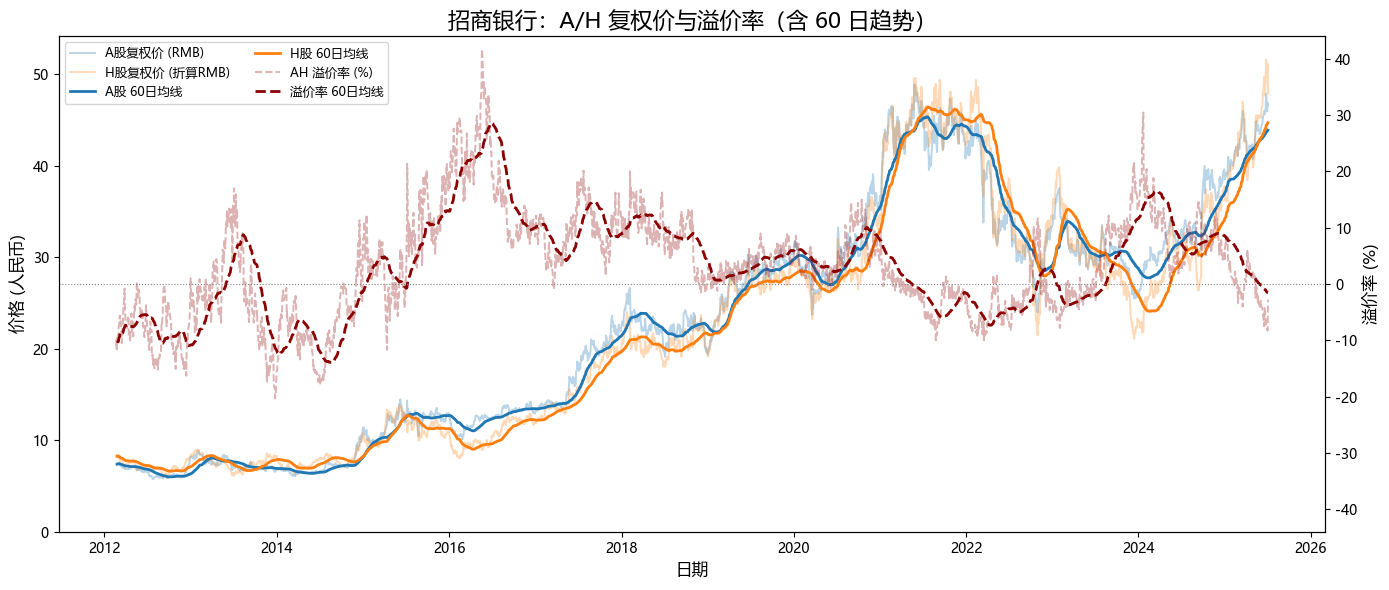

In [ ]:
plot_ah_price_premium("招商银行")

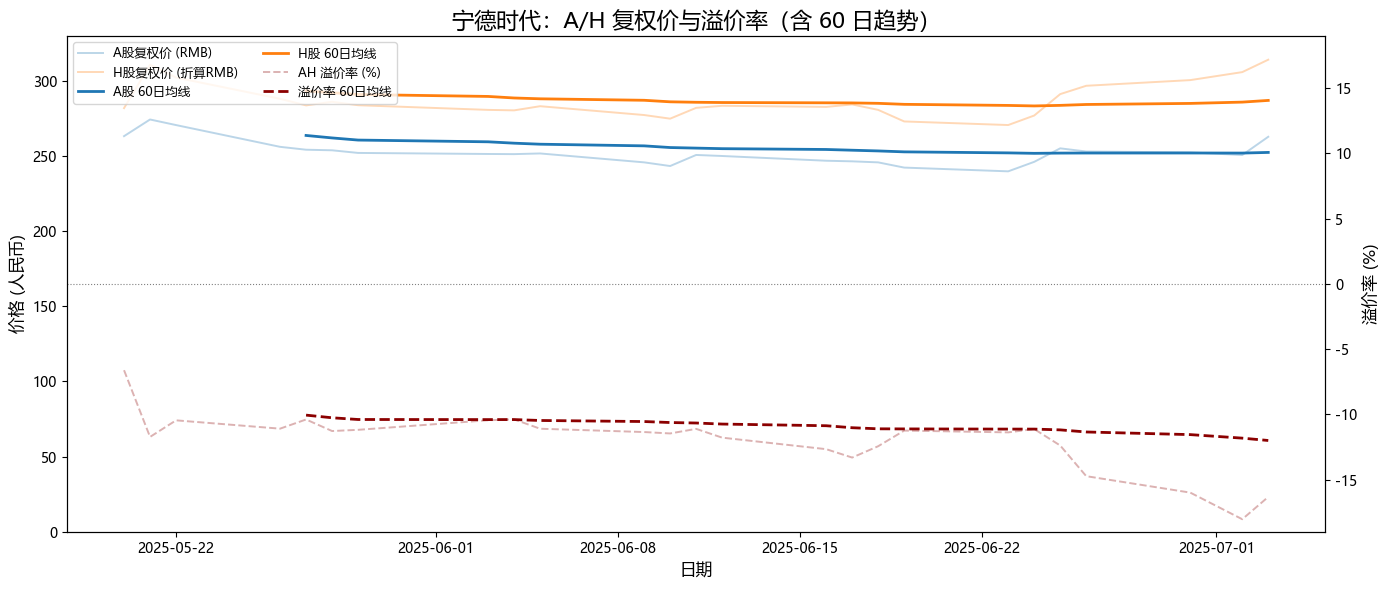

In [ ]:
plot_ah_price_premium("宁德时代")

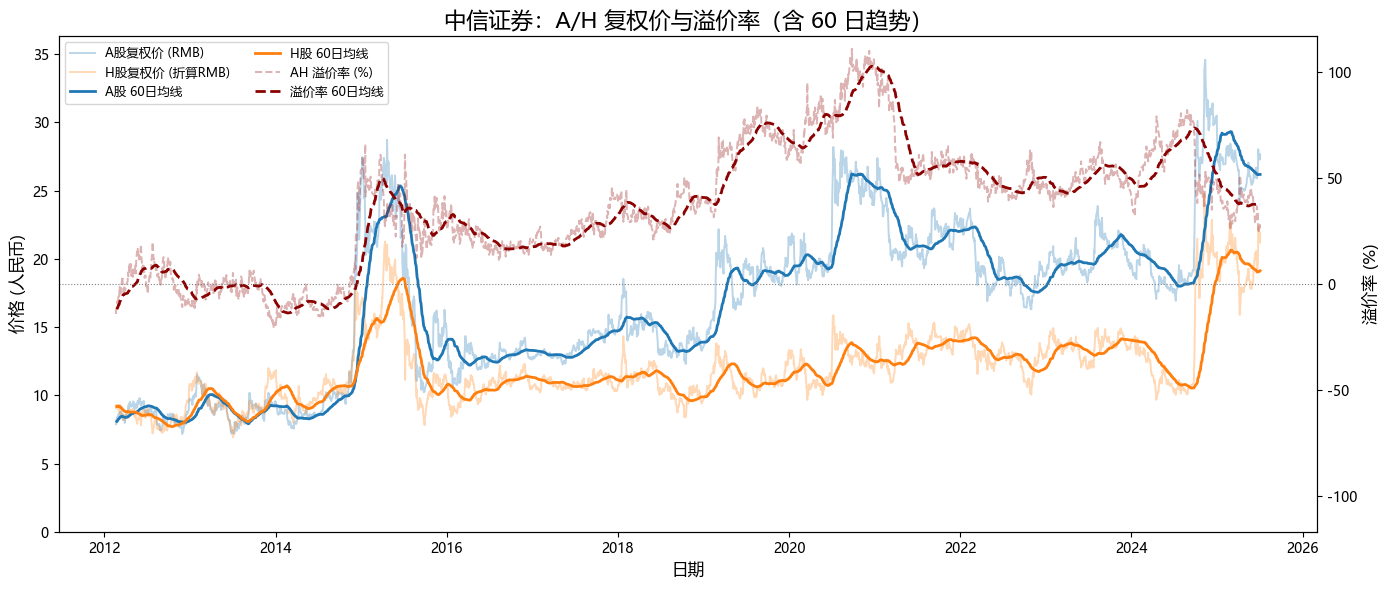

In [ ]:
plot_ah_price_premium("中信证券")

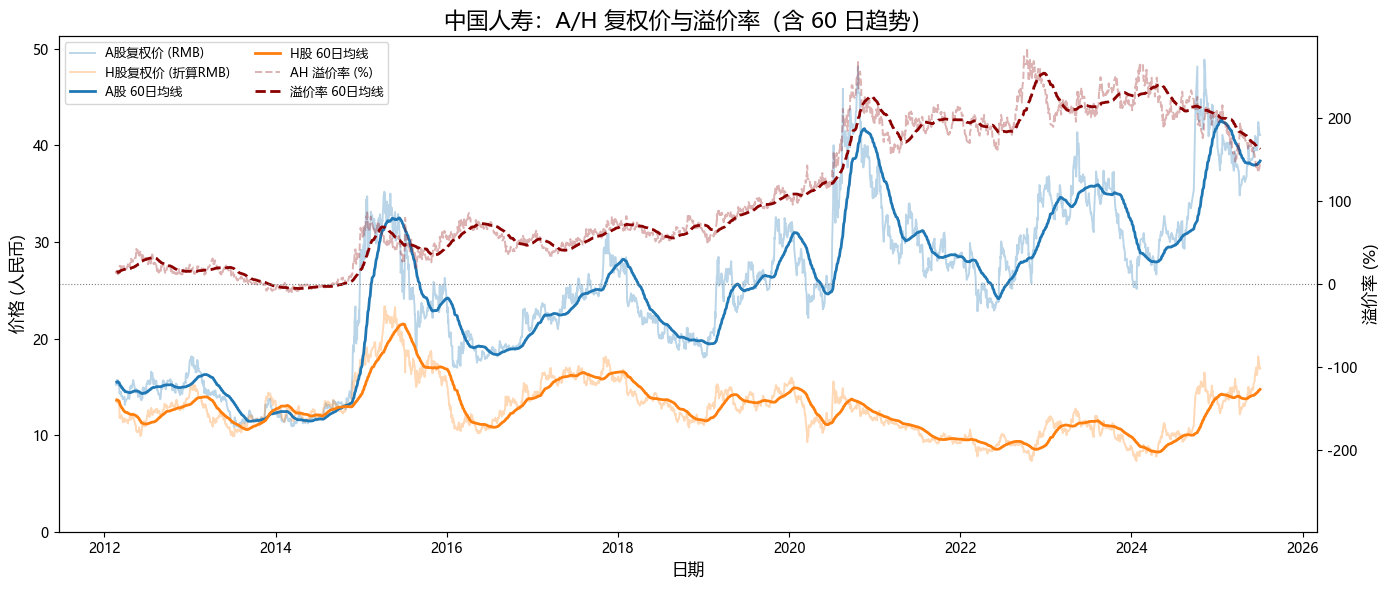

In [ ]:
plot_ah_price_premium("中国人寿")

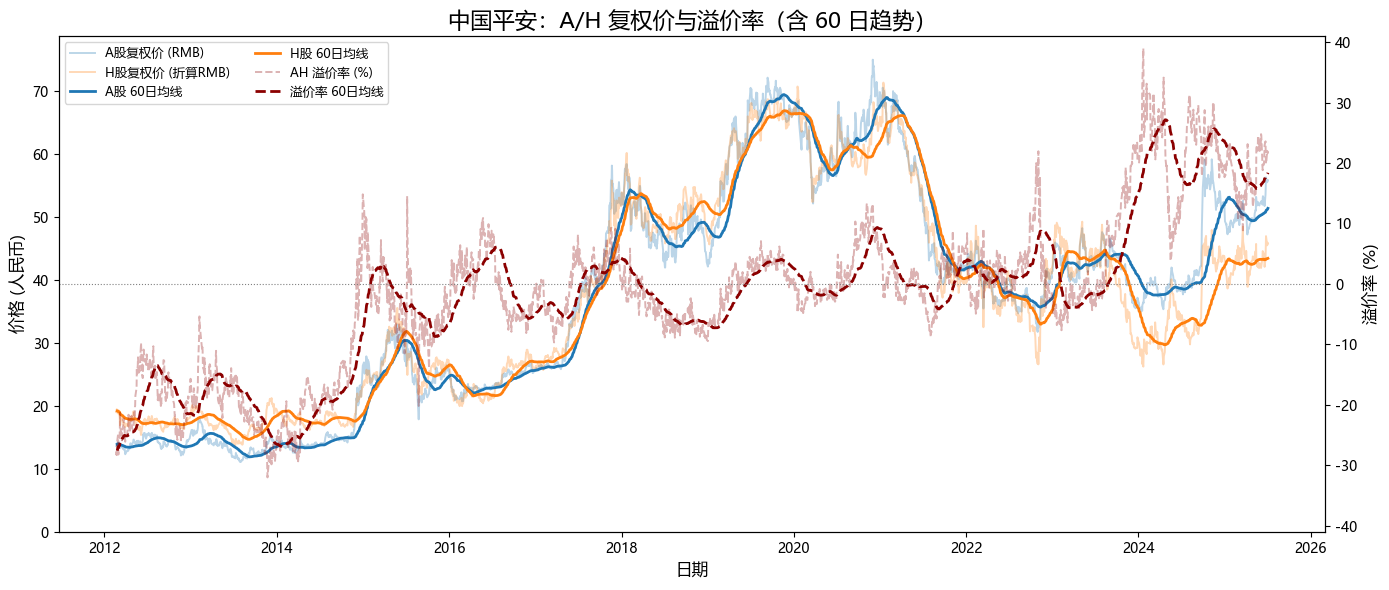

In [ ]:
plot_ah_price_premium("中国平安")

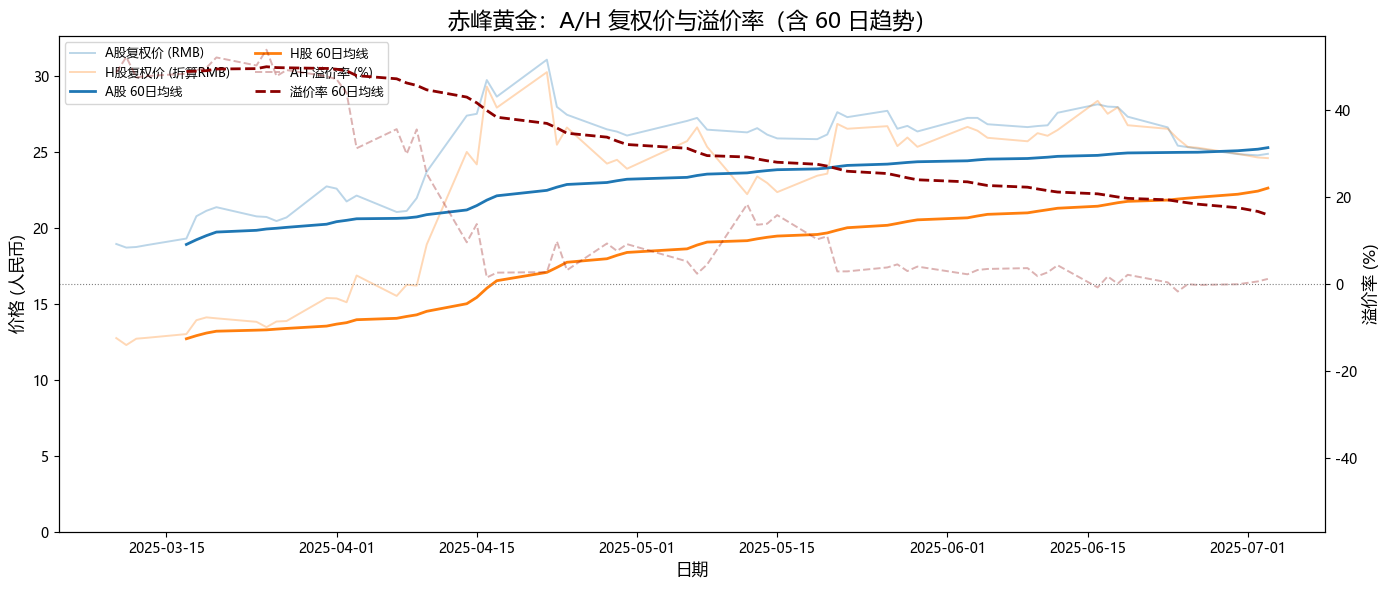

In [ ]:
plot_ah_price_premium("赤峰黄金")

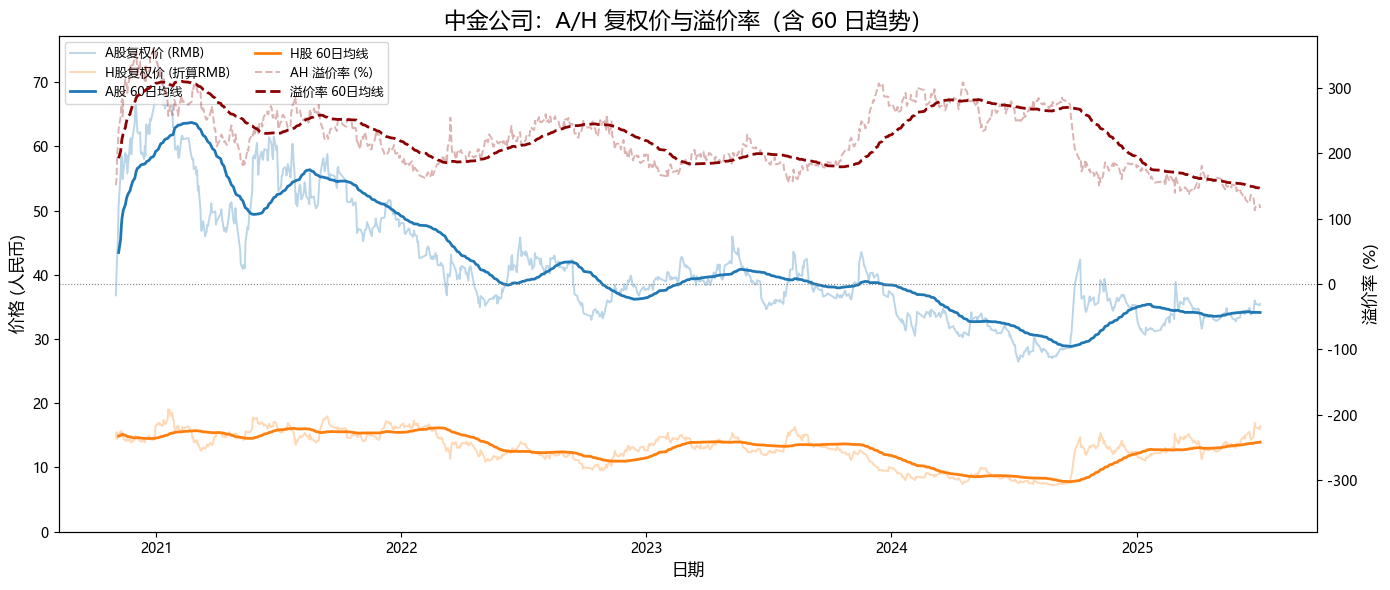

In [ ]:
plot_ah_price_premium("中金公司")

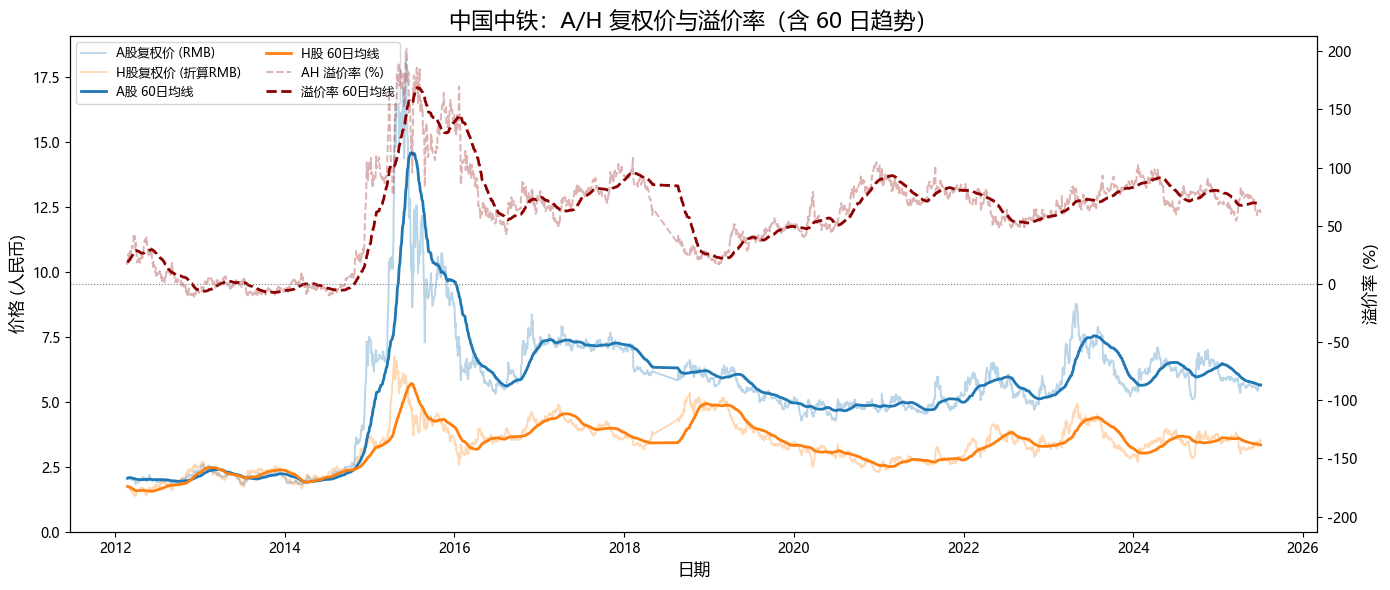

In [ ]:
plot_ah_price_premium("中国中铁")

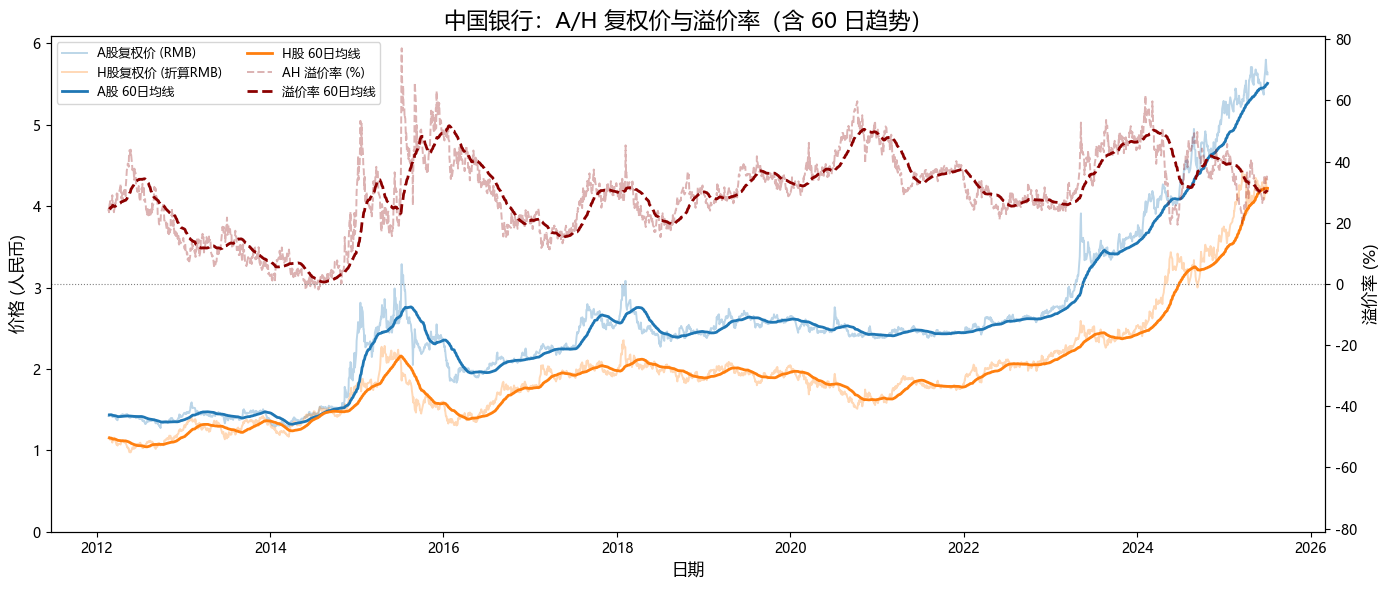

In [ ]:
plot_ah_price_premium("中国银行")

In [ ]:
plot_ah_price_premium("复旦张江")